In [1]:
# pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install tensorflow

In [1]:
import keras

In [2]:
keras.__version__

'3.6.0'

In [4]:
from keras.datasets import mnist

In [5]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from keras import models,layers

In [12]:
network = models.Sequential()
network.add(layers.Dense(512 , activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10 , activation = 'softmax'))

C:\Users\abdul.samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
print(test_labels[0])

7


In [16]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8744 - loss: 0.4377
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9658 - loss: 0.1206
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9778 - loss: 0.0740
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9850 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0386


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0684


In [20]:
print('test_acc:', test_acc)

test_acc: 0.9815000295639038


C:\Users\abdul.samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8655 - loss: 0.4625 - val_accuracy: 0.9534 - val_loss: 0.1529
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.1257 - val_accuracy: 0.9623 - val_loss: 0.1232
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9747 - loss: 0.0800 - val_accuracy: 0.9684 - val_loss: 0.1037
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9721 - val_loss: 0.0958
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9868 - loss: 0.0422 - val_accuracy: 0.9715 - val_loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0926
Test Accuracy: 0.98


Model saved as 'mnist_model.h5'


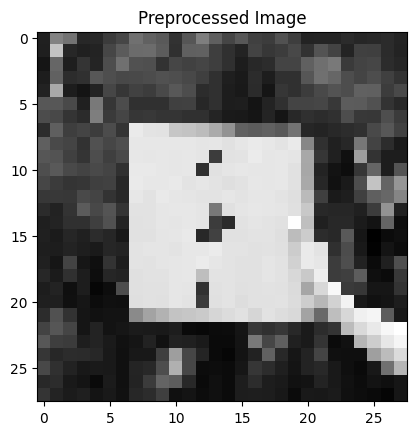

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Digit: 8


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the trained model
model.save('mnist_model.h5')
print("Model saved as 'mnist_model.h5'")




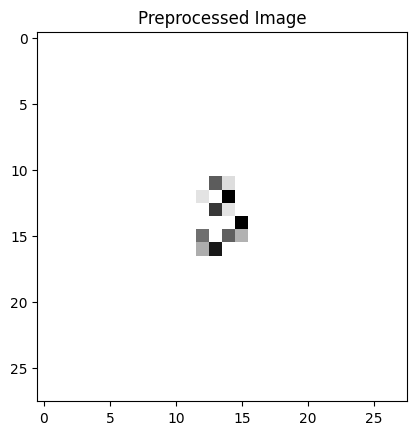

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Digit: 3


In [25]:
# Load and preprocess a custom handwritten image
image_path = 'three.png'  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Preprocess the image: resize, normalize, and reshape
img_resized = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
img_normalized = img_resized / 255.0  # Normalize pixel values to [0, 1]
img_reshaped = img_normalized.reshape(1, 28, 28)  # Reshape to (1, 28, 28)

# Visualize the preprocessed image
plt.imshow(img_resized, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Predict the digit using the trained model
model = tf.keras.models.load_model('mnist_model.h5')  # Load the saved model
predictions = model.predict(img_reshaped)
predicted_digit = np.argmax(predictions)

print(f"Predicted Digit: {predicted_digit}")